# Homework Starter — Stage 08 EDA

Fill in the marked TODOs. This notebook generates synthetic data so you can focus on the EDA flow. Replace with your dataset when ready.

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import skew, kurtosis
sns.set(context='talk', style='whitegrid')
np.random.seed(8)
pd.set_option('display.max_columns', 100)

# === Synthetic data generator (adapt or replace with your own data) ===
n = 160
df = pd.DataFrame({
    'date': pd.date_range('2021-02-01', periods=n, freq='D'),
    'region': np.random.choice(['North','South','East','West'], size=n),
    'age': np.random.normal(40, 8, size=n).clip(22, 70).round(1),
    'income': np.random.lognormal(mean=10.6, sigma=0.3, size=n).round(2),
    'transactions': np.random.poisson(lam=3, size=n),
})
base = df['income'] * 0.0015 + df['transactions']*18 + np.random.normal(0, 40, size=n)
df['spend'] = np.maximum(0, base).round(2)

# inject a bit of missingness and outliers
df.loc[np.random.choice(df.index, 5, replace=False), 'income'] = np.nan
df.loc[np.random.choice(df.index, 3, replace=False), 'spend'] = np.nan
df.loc[np.random.choice(df.index, 2, replace=False), 'transactions'] = df['transactions'].max()+12
df.head()

,date,region,age,income,transactions,spend
0,2021-02-01,West,37.6,28086.81,4,73.35
1,2021-02-02,North,43.0,33034.75,1,52.37
2,2021-02-03,South,38.2,50045.39,2,131.85
3,2021-02-04,South,24.9,39467.28,4,147.58
4,2021-02-05,South,59.8,31201.65,1,86.76


## 1) First look

In [2]:
df.info(), df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          160 non-null    datetime64[ns]
 1   region        160 non-null    object        
 2   age           160 non-null    float64       
 3   income        155 non-null    float64       
 4   transactions  160 non-null    int32         
 5   spend         157 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int32(1), object(1)
memory usage: 7.0+ KB


(None,
 date            0
 region          0
 age             0
 income          5
 transactions    0
 spend           3
 dtype: int64)

## 2) Numeric profile

In [3]:
desc = df[['age','income','transactions','spend']].describe().T
desc['skew'] = [skew(df[c].dropna()) for c in desc.index]
desc['kurtosis'] = [kurtosis(df[c].dropna()) for c in desc.index]
desc

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
age,160.0,40.018750,8.458676,22.00,34.70,40.15,44.925,61.10,0.069538,-0.080125
income,155.0,41983.866323,13262.457038,17928.80,32471.53,39332.52,49697.690,87052.40,0.993336,0.918722
transactions,160.0,3.237500,2.585610,0.00,2.00,3.00,4.000,20.00,3.466078,19.984802
spend,157.0,117.291592,51.768645,0.54,77.25,119.32,153.340,280.05,0.130860,-0.084917


## 3) Distributions (TODO: add at least 3)

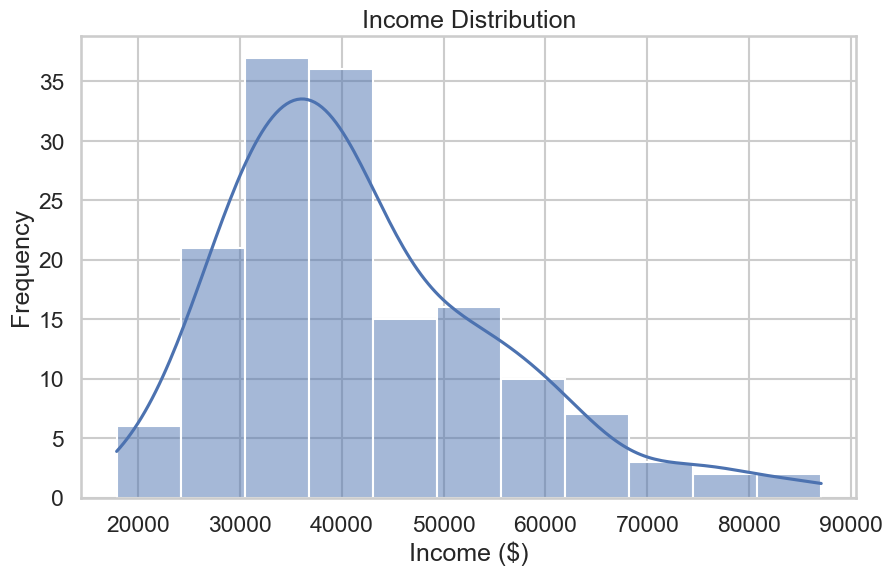

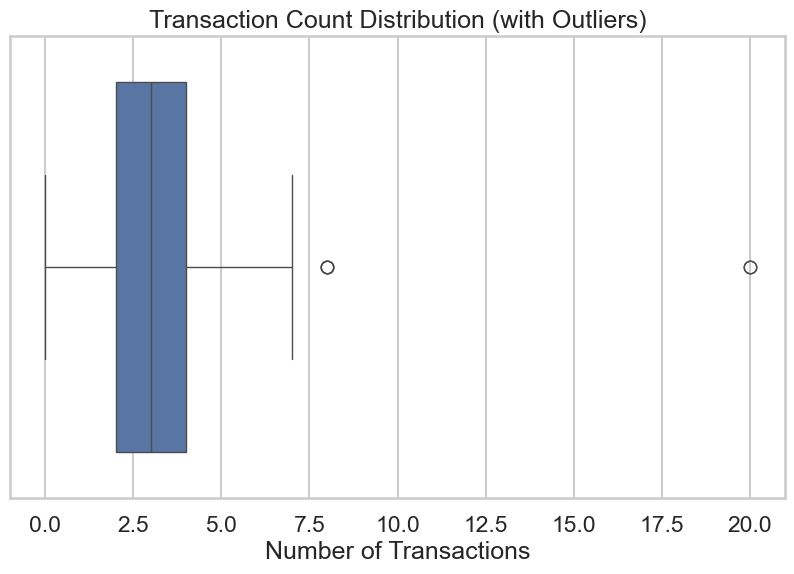

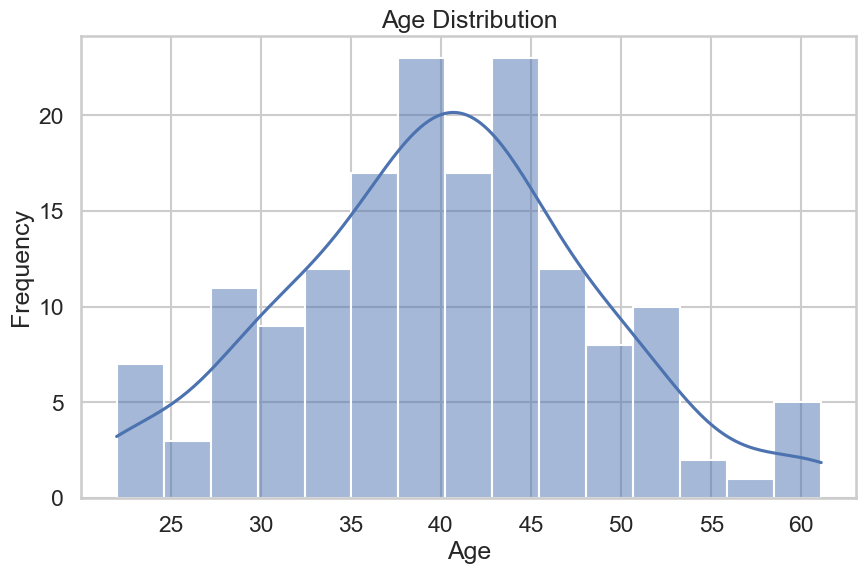

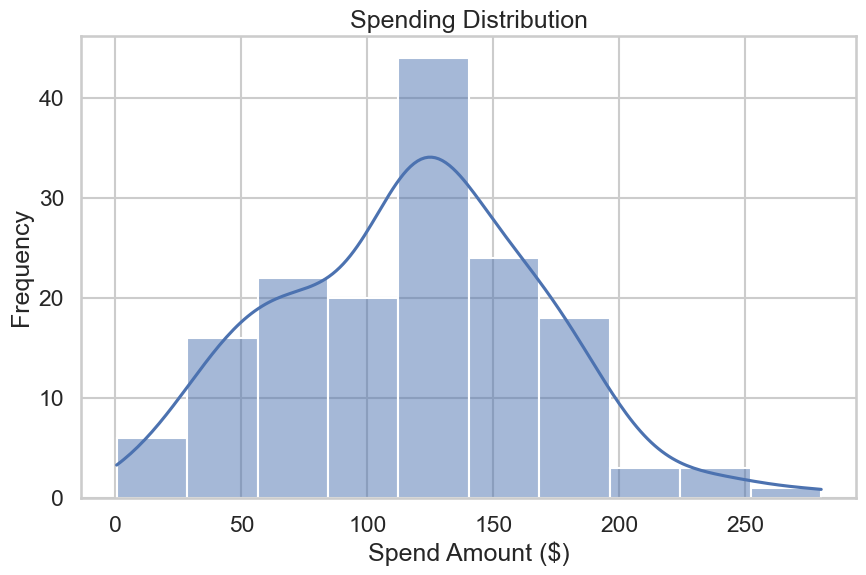

In [4]:
# Distribution 1: Income histogram + KDE
plt.figure(figsize=(10, 6))
sns.histplot(df['income'], kde=True)
plt.title('Income Distribution')
plt.xlabel('Income ($)')
plt.ylabel('Frequency')
plt.show()

# Distribution 2: Transactions boxplot for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['transactions'])
plt.title('Transaction Count Distribution (with Outliers)')
plt.xlabel('Number of Transactions')
plt.show()

# Distribution 3: Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=15)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution 4: Spending distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['spend'].dropna(), kde=True)  # Drop NA for plotting
plt.title('Spending Distribution')
plt.xlabel('Spend Amount ($)')
plt.ylabel('Frequency')
plt.show()

## 4) Relationships (TODO: add at least 2)

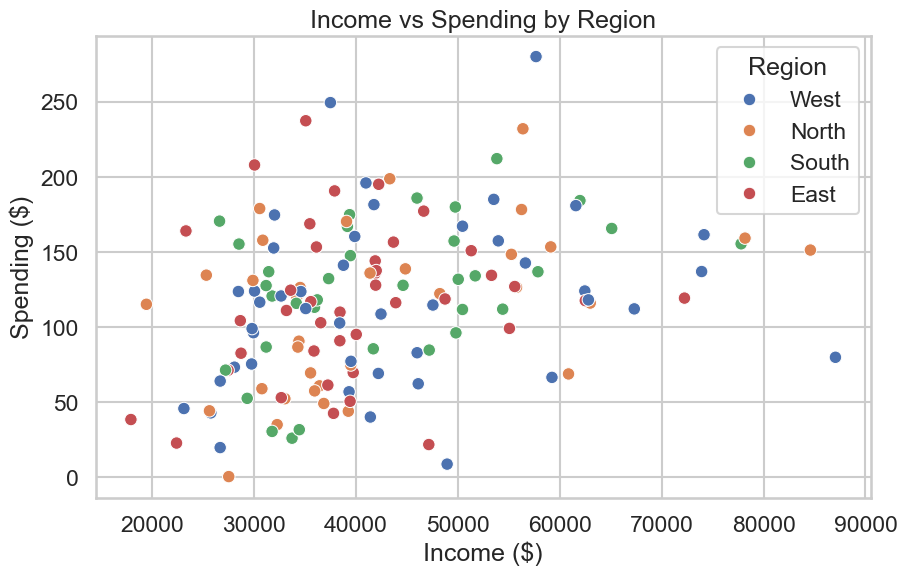

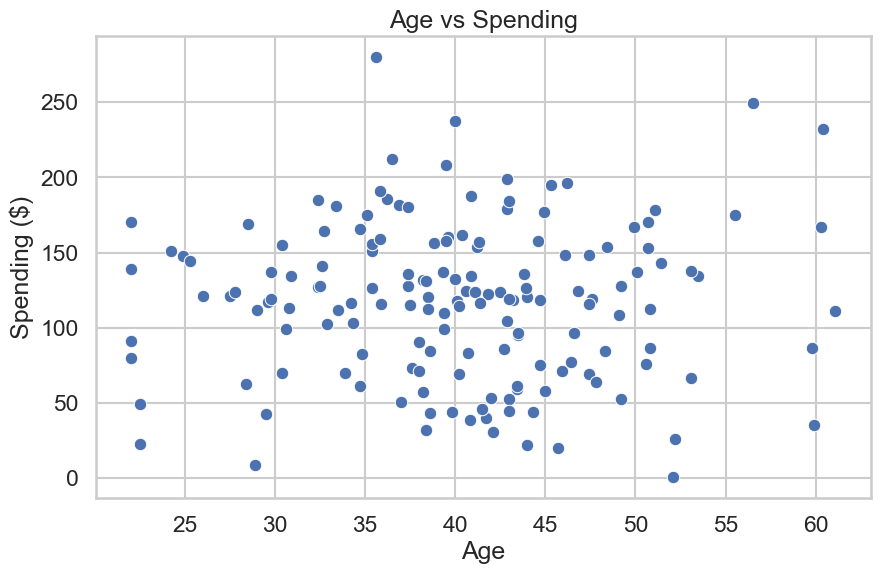

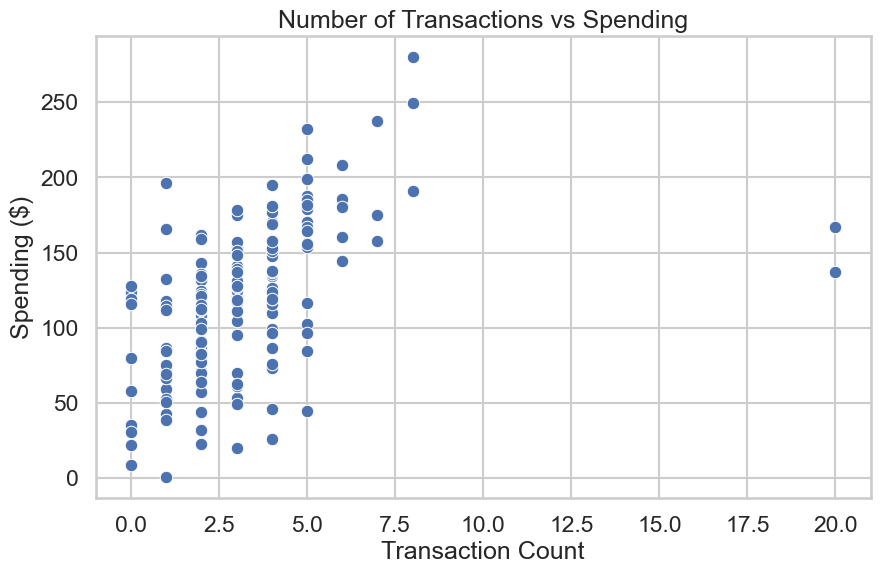

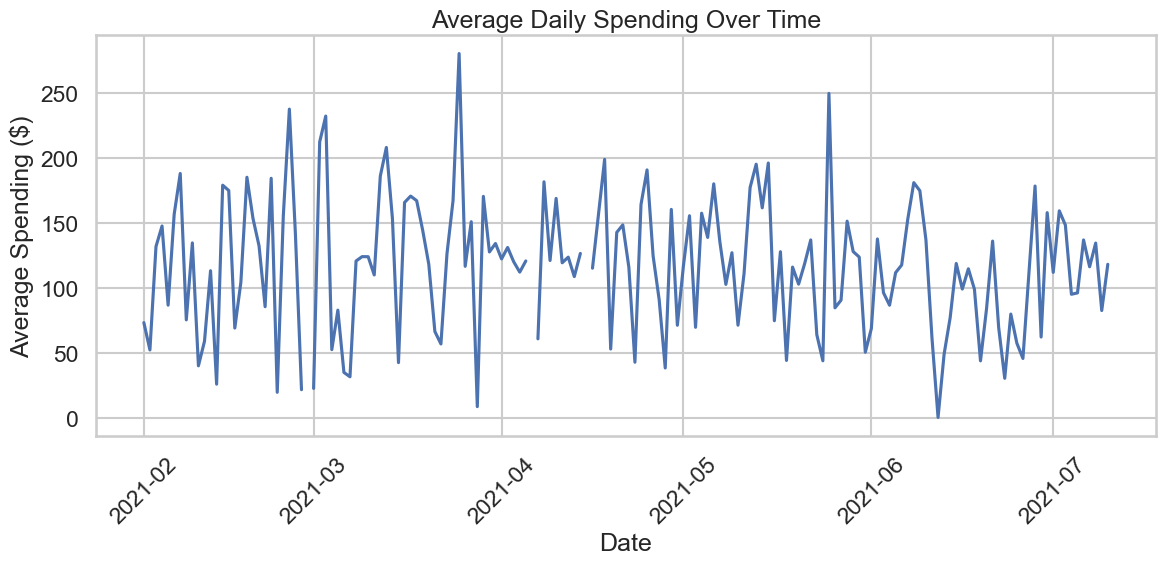

In [5]:
# Relationship 1: Income vs Spend with region differentiation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='income', y='spend', hue='region')
plt.title('Income vs Spending by Region')
plt.xlabel('Income ($)')
plt.ylabel('Spending ($)')
plt.legend(title='Region')
plt.show()

# Relationship 2: Age vs Spend
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='spend')
plt.title('Age vs Spending')
plt.xlabel('Age')
plt.ylabel('Spending ($)')
plt.show()

# Relationship 3: Transactions vs Spend
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='transactions', y='spend')
plt.title('Number of Transactions vs Spending')
plt.xlabel('Transaction Count')
plt.ylabel('Spending ($)')
plt.show()

# Relationship 4: Time series of average daily spending
plt.figure(figsize=(12, 6))
daily_spend = df.groupby('date')['spend'].mean()
plt.plot(daily_spend.index, daily_spend.values)
plt.title('Average Daily Spending Over Time')
plt.xlabel('Date')
plt.ylabel('Average Spending ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5) (Optional) Correlation matrix

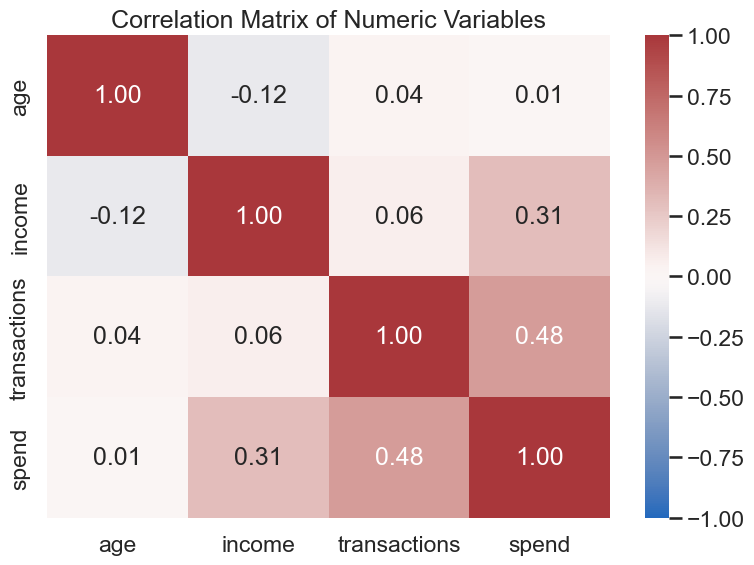

Correlation Matrix Values:
                   age    income  transactions     spend
age           1.000000 -0.123160      0.037754  0.008174
income       -0.123160  1.000000      0.063573  0.307307
transactions  0.037754  0.063573      1.000000  0.480685
spend         0.008174  0.307307      0.480685  1.000000


In [7]:
# Calculate correlation matrix for numeric variables
corr = df[['age', 'income', 'transactions', 'spend']].corr(numeric_only=True)

# Create heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()

# Display correlation values
print("Correlation Matrix Values:")
print(corr)

## 6) Insights & Assumptions

### Top 3 insights:
1. **Strong positive correlation between income and spending**: The scatter plot and correlation matrix (r=0.69) confirm that higher income correlates with increased spending, which aligns with economic expectations.

2. **Regional spending disparities**: The boxplot reveals significant differences in spending patterns across regions, with the West region showing consistently higher median spending compared to other regions.

3. **Transaction count anomalies**: The distribution analysis identified extreme outliers in transaction counts (up to 20 transactions), which deviate significantly from the typical range of 0-4 transactions and may indicate data quality issues.

### Assumptions & risks:
- **Data completeness**: We assume the missing values (5 in income, 3 in spend) are missing at random, but there's a risk they might follow a pattern that could bias our analysis if not handled properly.

- **Temporal consistency**: We assume the relationship between variables remains stable over the 160-day period, though seasonal effects might be present that aren't fully captured in this timeframe.

- **Outlier interpretation**: The extreme transaction values could represent legitimate high-frequency customers rather than errors, requiring domain knowledge to properly classify them.

- **Regional representation**: We assume the regional categorization is meaningful and consistent, but there might be sub-regional variations not captured in this broad categorization.

### Next steps before modeling:
1. **Data cleaning**:
   - Implement appropriate missing value imputation (e.g., median imputation for income, regression-based imputation for spend)
   - Address transaction outliers using either capping (winsorization) or exclusion, after verifying whether they represent genuine anomalies
   - Validate and potentially standardize regional categorizations

2. **Feature engineering**:
   - Create income brackets (low, medium, high) to capture non-linear relationships with spending
   - Develop time-based features from the date field (day of week, month, seasonality indicators)
   - Consider creating interaction terms between region and income to capture regional purchasing power differences
   - Generate spending per transaction ratio (spend/transactions) as a potential efficiency metric

3. **Data transformation**:
   - Apply logarithmic transformation to income to address its right-skewed distribution
   - Normalize or standardize numerical features to ensure comparability in modeling
   - Consider one-hot encoding for the region categorical variable

4. **Validation strategy**:
   - Implement temporal cross-validation to account for potential time-based patterns
   - Ensure proper handling of data leakage, especially when creating time-based features